best score: 0.7193, and best params: {'C': 100}
LR f1_score: 40.2286%


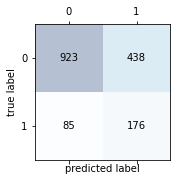

array([0, 1, 0, ..., 0, 0, 0])

In [4]:
from LRTuning import LRTuning
import pandas as pd

data = pd.read_csv("./data/1_train1.csv")
data = data.fillna(0)
del data[data.columns[0]]
X = data.iloc[:, :-1]
y = data['y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#数据平衡
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
oversample = BorderlineSMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)
y_over.value_counts()


lr = LRTuning(X_over, X_test, y_over, y_test)
lr.fit_transform()

In [5]:
test = pd.read_csv("./data/1_test1.csv")
test = test.fillna(0)
del test[test.columns[0]]
test



,hl_score,分类_0,分类_1,分类_2,分类_3,分类_4,分类_5,发文类型_0,发文类型_1,一个月,...,黑人,黑心,黑暗,黑色,默默,鼓励,鼓舞,鼻子,鼻酸,龚重安
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.20,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.14,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6484,0.06,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6485,0.06,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6486,0.20,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [6]:
test_pred = lr.predict(test)

AttributeError: 'NoneType' object has no attribute 'predict'